# TSP's Multidimensional Analysis
### Information and Decision Systems Group<br>University of Chile

Implementation of the TSP's multidimensional analysis presented by [Gonzalez et al. (2021)](https://arxiv.org/pdf/2110.14122.pdf). 

In [1]:
import sys
import time
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
from itertools import repeat
sys.path.insert(1, '../src/build')
from TSP import TSP
sys.path.insert(1, './utils')
from distributions import *

NUM_WORKERS = 4

In [2]:
# Utils
def tsp_experiment(iteration, tsp_params, dist, dist_params):
    l_bn, w_bn, lambdas = tsp_params
    dim, corr, n_samples = dist_params
    _, X, Y, _ = dist(dim, corr, n_samples)
    emis = []
    for l in lambdas:
        l_sizes = []
        l_emis = []
        tsp = TSP(l_bn, w_bn, l)
        for n in samples:
            tsp.grow(np.copy(X[:n], order='F'), np.copy(Y[:n], order='F'))
            if l != 0:
                tsp.regularize()
            l_emis.append(tsp.emi())
        emis.append(l_emis)
    return emis

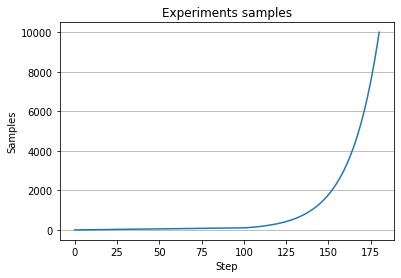

In [3]:
# Number of samples per step
samples = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 
                    26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 
                    49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 
                    72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 
                    95, 96, 97, 98, 99, 100, 101, 107, 114, 120, 127, 135, 143, 151, 160, 169, 179, 190, 201, 
                    213, 225, 239, 253, 268, 283, 300, 318, 336, 356, 377, 400, 423, 448, 475, 503, 532, 564, 
                    597, 632, 670, 709, 751, 796, 843, 893, 946, 1001, 1061, 1124, 1190, 1260, 1335, 1414, 1498,
                    1586, 1680, 1780, 1885, 1997, 2115, 2240, 2373, 2513, 2662, 2820, 2987, 3164, 3351, 3550, 
                    3760, 3983, 4218, 4468, 4733, 5013, 5310, 5625, 5958, 6311, 6685, 7081, 7500, 7945, 8415, 
                    8914, 9442, 10001])
step_to_samples = dict(zip(range(1, len(samples) + 1), samples))
n_samples = samples[-1]
plt.plot(samples)
plt.title('Experiments samples')
plt.xlabel('Step')
plt.ylabel('Samples')
plt.grid(axis='y')
plt.show()

## Multidimensional Heuristic for the $w$-parameter

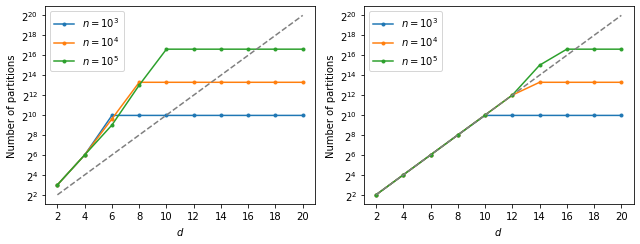

In [4]:
# Heristic #1: w(d)=0.1^(d/2)
d_array = []
for d in range(1,11):
    size_array = []
    for i in [1000, 10000, 100000]:
        _, X, Y, mi = gaussian_dist(d, 0.7, 1000000)
        w = 0.1 ** (d)
        tsp = TSP(0.001, w, 0)
        tsp.grow(np.copy(X[:i], order='F'), np.copy(Y[:i], order='F'))
        size_array.append([tsp.size(), 2**(2*d)])
    d_array.append(size_array)
d_array = np.array(d_array)

# Heristic #2: w(d)=0.225^(d/2)
d_array2 = []
for d in range(1,11):
    size_array = []
    for i in [1000, 10000, 100000]:
        _, X, Y, mi = gaussian_dist(d, 0.7, 1000000)
        w = 0.225 ** (d)
        tsp = TSP(0.001, w, 0)
        tsp.grow(np.copy(X[:i], order='F'), np.copy(Y[:i], order='F'))
        size_array.append([tsp.size(), 2**(2*d)])
    d_array2.append(size_array)
d_array2 = np.array(d_array2)

# Plots
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
N = ['10^3', '10^4', '10^5']
plt.figure(figsize=(9,3.5))
plt.subplot(1,2,1)
for i in range(len(N)):
    plt.plot(np.array(range(1,11)) * 2, d_array[:,i,0], '.-', label=r'$n={}$'.format(N[i]), color=colors[i])
plt.plot(np.array(range(1,11)) * 2, d_array[:,i,1], '--', color='tab:gray')
plt.xlabel(r'$d$')
plt.yscale('log', basey=2)
plt.ylabel('Number of partitions')
plt.xticks(np.array(range(1,11)) * 2)
plt.yticks(d_array[:,i,1])
plt.legend()
plt.subplot(1,2,2)
for i in range(len(N)):
    plt.plot(np.array(range(1,11)) * 2, d_array2[:,i,0], '.-', label=r'$n={}$'.format(N[i]), color=colors[i])
plt.plot(np.array(range(1,11)) * 2, d_array2[:,i,1], '--', color='tab:gray')
plt.xlabel(r'$d$')
plt.yscale('log', basey=2)
plt.ylabel('Number of partitions')
plt.xticks(np.array(range(1,11)) * 2)
plt.yticks(d_array2[:,i,1])
plt.legend()
plt.tight_layout()
plt.show()

## Same MI along dimensions

In [5]:
# Array of correlations with the same theoretical multidimensional Gaussian MI 
rho_d_0_3 = [None, 0.3, 0.21461, 0.17592, 0.15265, 0.13669, 0.12488]    # mi = 0.06803
rho_d_0_5 = [None, 0.5, 0.36603, 0.30239, 0.26343, 0.23646, 0.21637]    # mi = 0.20752
rho_d_0_7 = [None, 0.7, 0.534657, 0.44838, 0.393615, 0.35496, 0.325816] # mi = 0.48572

In [6]:
# Experimental setting
dist = gaussian_dist
dim = 3
n_iterations = 1000
correlations = [0, rho_d_0_3[dim], rho_d_0_5[dim], rho_d_0_7[dim]]
# TSP parameters
l_bn = 0.001
w_bn = 0.225 ** dim
lambdas = [2e-06, 3e-06, 4e-06, 5e-06, 6e-06, 7e-06, 8e-06, 9e-06, 1e-05, 1.38e-05, 
           1.75e-05, 2.13e-05, 2.5e-05, 3e-05, 3.5e-05, 4e-05, 4.5e-05, 5e-05]
# Experiments (parallelized)
results = []
for corr in correlations:
    tsp_params = [l_bn, w_bn, lambdas]
    dist_params = [dim, corr, n_samples]
    pool = mp.Pool(NUM_WORKERS)
    start_time = time.time()
    res = pool.starmap_async(tsp_experiment, list(zip(range(n_iterations), 
                                                      repeat(tsp_params), 
                                                      repeat(dist),
                                                      repeat(dist_params))))
    pool.close()
    pool.join()
    end_time = time.time()
    results.append(np.array(res.get()))
    print("Correlation: {:.5f} | Elapsed Time: {:.2f} [min]".format(corr, (end_time - start_time) / 60))

Correlation: 0.00000 | Elapsed Time: 21.74 [min]
Correlation: 0.17592 | Elapsed Time: 21.65 [min]
Correlation: 0.30239 | Elapsed Time: 21.40 [min]
Correlation: 0.44838 | Elapsed Time: 21.44 [min]


In [8]:
# Decreasing polynomial threshold
K = 0.5
p = 1.0
threshold = (K * samples ** -p)[:results[0].shape[-1]]

# Independence detection
results_table = [lambdas]
for l in range(len(correlations)):
    corr = correlations[l]
    data = results[l]
    results_corr = []
    for i in range(data.shape[1]):
        detection_times = []
        for k in range(data.shape[0]):
            # Decision rule
            if (corr > 0):
                phi = np.where(threshold < data[k,i,:], 0, 1)
            else:
                phi = np.where(threshold > data[k,i,:], 0, 1)
            # Detection time
            aux = np.cumsum(np.flip(phi))
            if (aux > 0).any():
                detec_time = data.shape[-1] - np.where(aux > 0)[0][0]
                detection_times += [detec_time]
            else:
                detection_times += [1]
        # Percentile 95 of detection time distribution
        results_corr.append(np.percentile(detection_times, 95, interpolation='higher'))
    results_table.append(results_corr)

# Step to samples
pd.set_option('display.float_format', '{:.7f}'.format)
df_tsp = pd.DataFrame(results_table)
df_tsp = df_tsp.transpose()
df_tsp[df_tsp.columns[1:]] = df_tsp[df_tsp.columns[1:]].applymap(np.int64)
df_tsp[df_tsp.columns[1:]] = df_tsp[df_tsp.columns[1:]].replace(step_to_samples)
df_tsp.columns = [r'$\alpha$', r'$\sigma=0.0$', r'$\sigma=0.3$', r'$\sigma=0.5$', r'$\sigma=0.7$']
df_tsp

,$\alpha$,$\sigma=0.0$,$\sigma=0.3$,$\sigma=0.5$,$\sigma=0.7$
0,0.0000020,10001,5,5,5
1,0.0000030,8415,5,5,5
2,0.0000040,4733,5,5,5
3,0.0000050,3164,5,5,5
4,0.0000060,2240,5,5,5
5,0.0000070,1780,5,5,5
6,0.0000080,1335,751,5,5
7,0.0000090,1124,1997,7,7
8,0.0000100,893,3164,9,7
9,0.0000138,503,7500,99,10


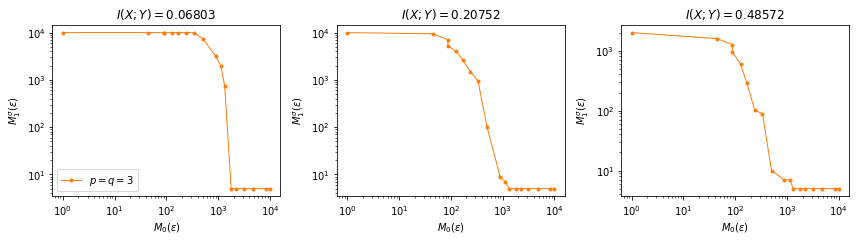

In [9]:
# Independence detection Trade-off curve
tabs = [df_tsp]
names = [r'$p=q=3$']
rhos = [0.3, 0.5, 0.7]
mis = [0.06803, 0.20752, 0.48572]    
plt.figure(figsize=(12,6))
for j in range(len(rhos)):
    plt.subplot(2, 3, j+1)
    for i in range(len(tabs)):
        plt.plot(tabs[i][tabs[i].columns[1]].to_numpy(), 
                 tabs[i][tabs[i].columns[j+2]].to_numpy(), '.-', label=names[i], 
                 zorder=len(tabs)-i, ms=6, color='tab:orange', linewidth=1)
    plt.xlabel(r'$M_0(\epsilon)$')
    plt.ylabel(r'$M^\sigma_1(\epsilon)$'.format(rhos[j]))
    plt.title(r'$I(X;Y)={}$'.format(mis[j]))
    plt.xscale('log')
    plt.yscale('log')
    if j == 0:
        plt.legend(prop={'size': 10})
plt.tight_layout()
plt.show()